<a href="https://colab.research.google.com/github/Omsai-2000/Exploratory-Data-Analysis/blob/main/Handling_missing_values_using_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Missing Values- Feature Engineering

>Lifecycle of a Data Science Projects

1.  Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2.  Feature Engineering---Handling Missing Values

> Why are their Missing values?? Survey--Depression Survey

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

> Data Science Projects---Dataset should be collected from multiple sources

>  What are the different types of Missing Data?

>  Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [2]:
import pandas as pd

# Importing titanic train dataset

df=pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

# Example for Missing completly at random shown below features like Age, cabin and Embarked.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


> Missing Data Not At Random(MNAR):Systematic missing Values

> There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [ ]:
# Missing data not at random

import numpy as np

df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

df['Cabin_null'].mean()

0.7710437710437711

In [ ]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# All Techniques to handle missing values

1.   Mean,Median and mode replacement
2.   Random sampling imputation
3.   Capturing NAN values with a new feature
4.   End of distribution imputation
5.   Arbitrary imputation
6.   Frequent categories imputation




## **1. Mean/Median imputation**



> Why should we apply the above techniques ?



> Mean/median imputation has assumption that the data is missing completly at random. We solve this by replacing NAN values with most frequent occurence of the variables.





In [ ]:
df=pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# percentage of missing values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df,variable,median):
  df[variable+"_median"]= df[variable].fillna(median)

In [ ]:
median=df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


#### Observation: Their is no much difference in std deviation when missing values filled with median

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

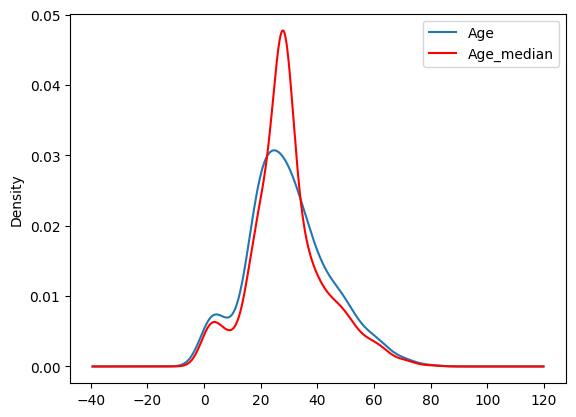

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

## **Advantages and disadvantages of mean/median imputation**

>  **Advantages**

1.   Easy to implement(Robust to outliers)
2.   Faster way to obtain the complete dataset

> **Disdavantages**



1.   Change or distortion in original variance
2.   Impacts correlation




# **2. Random sample imputation**

> It consists of taking random observations from the dataset and we can use this observations to replace NAN values.

> **When it should be used ?**

> It assumes that data is missing completely at random.

In [4]:
df=pd.read_csv("train.csv", usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
# percentage of null values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
df['Age'].isnull().sum()

177

In [13]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [14]:
def impute_nan(df,variable,median):
  df[variable+"_median"]= df[variable].fillna(median)
  df[variable+"_random"]= df[variable]
  # It will have the random samples to fill NAN values
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

  # pandas need to have same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [17]:
median=df.Age.median()
median

28.0

In [18]:
impute_nan(df,'Age',median)

In [20]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


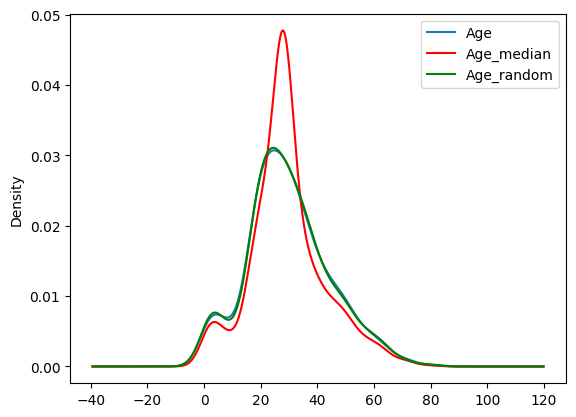

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

> **Adavanatges**


1.   Easy to implent
2.   Their is less distortion in variance

> **Disadvantages**


1.   In every situation randomness won't work



In [26]:
df=pd.read_csv('train.csv',usecols=(['Age','Fare','Survived']))
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:

import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [31]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


> **Advantages**



1.   Easy to implent
2.   Captures the importance of missing values

> Disadvantages

1.  Creating additional featues(Curse of dimentionality)



# **3. End of Distribution Imputation**
> It is used to replace missing data with values that are at the tails of the distribution of the variable.

In [59]:
df=pd.read_csv('train.csv',usecols=(['Age','Fare','Survived']))
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

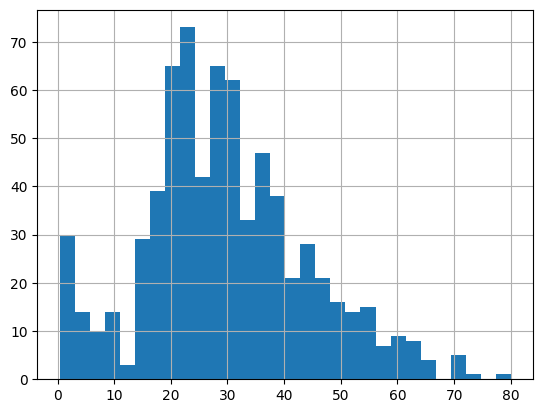

In [60]:
df.Age.hist(bins=30)

In [61]:
# Taking values from end/afer of 3rd standard deviation

extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

<Axes: xlabel='Age'>

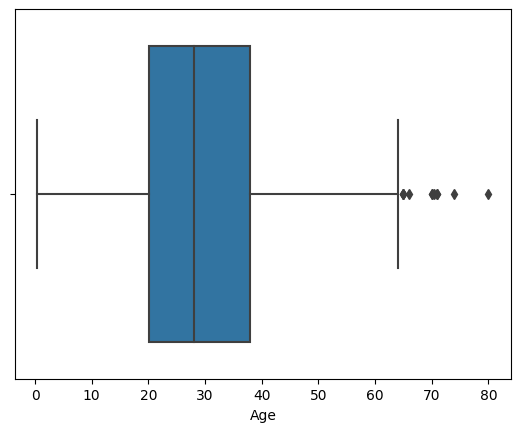

In [62]:
import seaborn as sns
sns.boxplot(x='Age',data=df)

In [63]:
def impute_nan(df,variable,median,extreme):
  df[variable+"_end_distribution"]= df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [64]:
impute_nan(df,"Age",df.Age.median(),extreme)
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

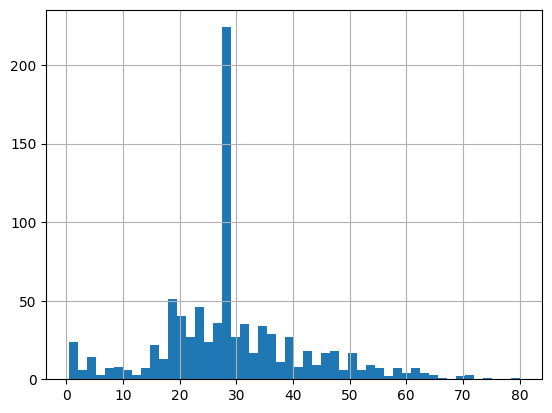

In [65]:
df['Age'].hist(bins=50)

<Axes: >

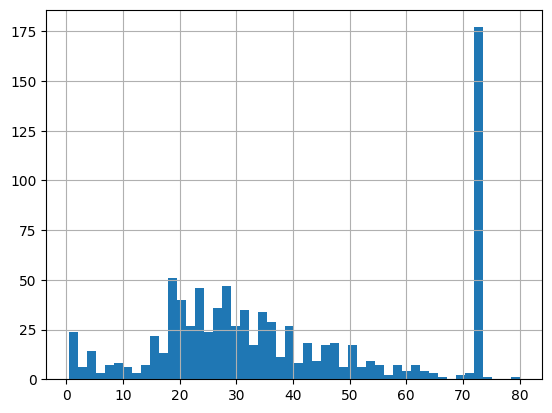

In [66]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

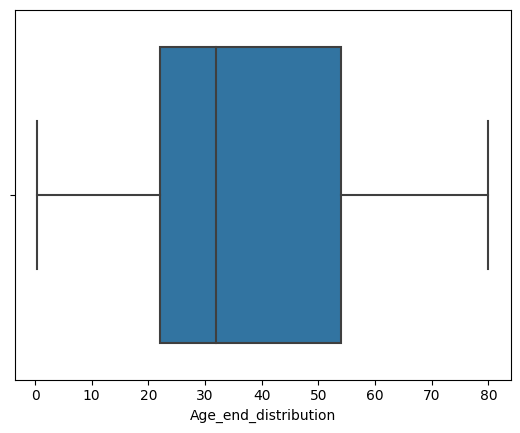

In [69]:
sns.boxplot(x='Age_end_distribution',data=df)

# **Advantages**:
· Easy to implement

· Fast way of obtaining complete datasets

· Can be integrated into production (during model deployment)

· Captures the importance of “missingness” if there is one

## **Disadvantages**:
· Distortion of the original variable distribution

· Distortion of the original variance

· Distortion of the covariance with the remaining variables of the dataset

· This technique may mask true outliers in the distribution
